In [1]:
# Spacy, nltk, textblob, pandas, numpy, matplotlib, scikit-learn
# Download this in prompt: python -m spacy download en
# There are a few more downloads below

import spacy

nlp_model = spacy.load("en_core_web_sm")

# Create a Doc object
doc = nlp_model(u"Kevin loves kebabpizaa with white souce")

# Print each token separately
for token in doc:
    print(token.text, token.pos_, token.dep_)
    

Kevin PROPN nsubj
loves AUX aux
kebabpizaa VERB ROOT
with ADP prep
white ADJ amod
souce NOUN pobj


# Sentiment analysis


In [8]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t')

# Shape
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [9]:
review = data['verified_reviews']
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [10]:
# Check for the existence of NaN values in a cell:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [11]:
data.dropna(inplace=True)

data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [12]:
r=0
blanks = []  # start with an empty list

for i in data['verified_reviews']:
    if i.isspace():
        blanks.append(r)

    r=r+1
        
blanks

[85,
 183,
 219,
 374,
 406,
 524,
 654,
 780,
 878,
 914,
 1094,
 1112,
 1119,
 1150,
 1151,
 1275,
 1321,
 1354,
 1360,
 1385,
 1389,
 1420,
 1447,
 1461,
 1513,
 1558,
 1577,
 1581,
 1614,
 1728,
 1761,
 1764,
 1808,
 1954,
 1975,
 1981,
 1987,
 2014,
 2019,
 2032,
 2037,
 2048,
 2073,
 2104,
 2107,
 2131,
 2141,
 2187,
 2197,
 2221,
 2244,
 2359,
 2430,
 2455,
 2510,
 2525,
 2567,
 2627,
 2628,
 2662,
 2732,
 2763,
 2769,
 2772,
 2775,
 2790,
 2806,
 2861,
 2876,
 2918,
 2978,
 2979,
 3013,
 3083,
 3114,
 3120,
 3123,
 3126,
 3141]

In [13]:
data.drop(blanks, inplace=True)

data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [14]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

data['cleaned_data'] = data['verified_reviews'].apply(clean_data)

In [15]:
data

,rating,date,variation,verified_reviews,feedback,cleaned_data
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,Perfect for kids adults and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,Listening to music searching locations checkin...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,I do love these things i have them running my ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,Only complaint I have is that the sound qualit...


In [16]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

data['cleaned_data'] = data['cleaned_data'].apply(drop_numbers)

In [17]:
data

,rating,date,variation,verified_reviews,feedback,cleaned_data
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My yr...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,Perfect for kids adults and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,Listening to music searching locations checkin...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,I do love these things i have them running my ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,Only complaint I have is that the sound qualit...


In [18]:
# changing all the words of the reviews column to lowercase letters
# From library word_tokenize
import nltk
nltk.download('punkt')

def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

data['cleaned_data'] = data['cleaned_data'].apply(lower_case)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
data

,rating,date,variation,verified_reviews,feedback,cleaned_data
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my yr ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect for kids adults and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening to music searching locations checkin...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i do love these things i have them running my ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...


In [20]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
lemmatizer = WordNetLemmatizer()

def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

data['cleaned_data'] = data['cleaned_data'].apply(lemmatise)
data

,rating,date,variation,verified_reviews,feedback,cleaned_data
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my yr ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect for kid adult and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening to music searching location checking...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i do love these thing i have them running my e...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...


In [22]:
nltk.download('stopwords')

def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

data['cleaned_data'] = data['cleaned_data'].apply(remove_stopword)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
data

,rating,date,variation,verified_reviews,feedback,cleaned_data
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing yr old learns dinosaur control l...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect kid adult everyone
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening music searching location checking ti...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,love thing running entire home tv light thermo...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,complaint sound quality great mostly use comma...


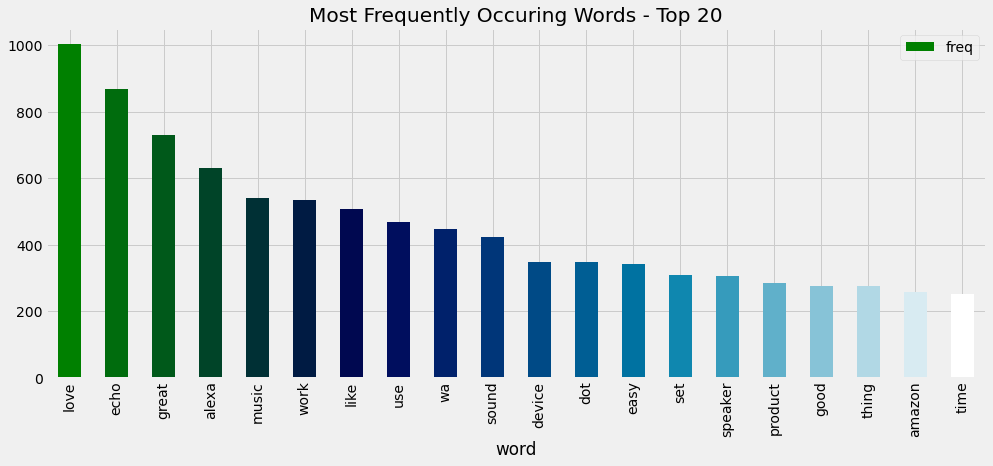

In [24]:
## Visualizing the Most Frequent Words

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.cleaned_data)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

In [25]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0.1 and pol<=1):
        return "Positive"
    elif(pol>-1 and pol<=-0.1):
        return "Negative"
    
data['polarity'] = data['cleaned_data'].apply(get_polarity)

<AxesSubplot:>

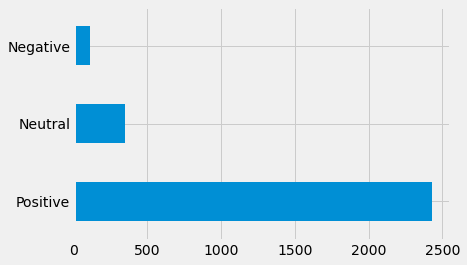

In [26]:
data['polarity'].value_counts().plot(kind='barh')

In [27]:
data['polarity'].value_counts()

Positive    2427
Neutral      346
Negative     112
Name: polarity, dtype: int64

# Classification

In [28]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

data = pd.read_csv('moviereviews.tsv', delimiter = '\t')

# data
data

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [29]:
data.isnull().sum()

label      0
review    35
dtype: int64

In [30]:
data.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [31]:
data.dropna(inplace=True)

data

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [32]:
r=0
blanks = []  # start with an empty list

for i in data["review"]:
    if i.isspace():
        blanks.append(r)

    r=r+1
blanks

[57,
 71,
 146,
 150,
 280,
 304,
 310,
 320,
 339,
 347,
 423,
 496,
 626,
 668,
 803,
 838,
 963,
 1063,
 1278,
 1430,
 1466,
 1498,
 1504,
 1730,
 1818,
 1871,
 1958]

In [33]:
data

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [42]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|($)|(https://[\w.]+/[\w]+)", " ", text).split())

data['cleaned_data'] = data["review"].apply(clean_data)

def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

data['cleaned_data'] = data['cleaned_data'].apply(drop_numbers)

In [40]:
# changing all the words of the reviews column to lowercase letters
# From library word_tokenize
import nltk
nltk.download('punkt')

def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

data['cleaned_data'] = data['cleaned_data'].apply(lower_case)

import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

data['cleaned_data'] = data['cleaned_data'].apply(lemmatise)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

data['cleaned_data'] = data['cleaned_data'].apply(remove_stopword)

In [48]:
data

,label,review,cleaned_data
0,neg,how do films like mouse hunt get into theatres...,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...,my first press screening of and already i ve ...
5,neg,"to put it bluntly , ed wood would have been pr...",to put it bluntly ed wood would have been prou...
6,neg,"synopsis : melissa , a mentally-disturbed woma...",synopsis melissa a mentally disturbed woman wh...
7,neg,tim robbins and martin lawernce team up in thi...,tim robbins and martin lawernce team up in thi...
8,neg,"in "" gia "" , angelina jolie plays the titular ...",in gia angelina jolie plays the titular charac...
9,neg,"in 1990 , the surprise success an unheralded l...",in the surprise success an unheralded little ...


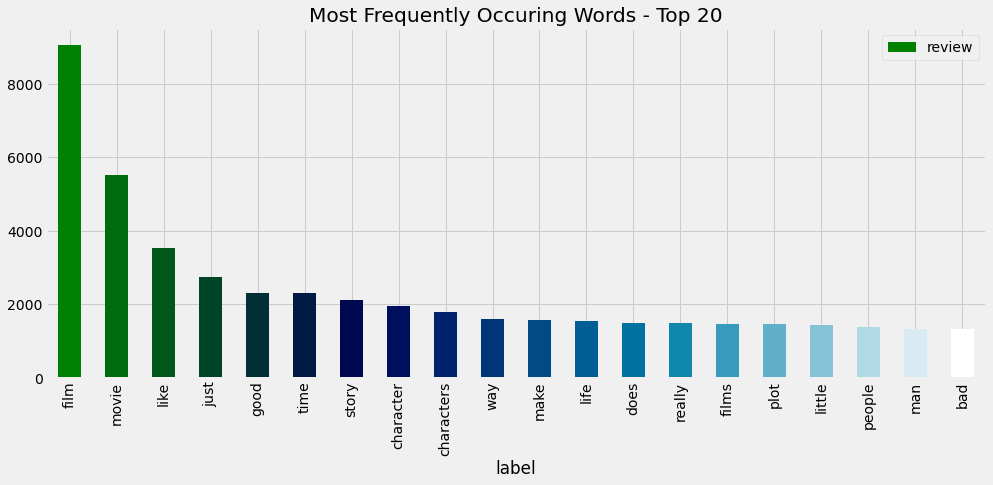

In [53]:
## Visualizing the Most Frequent Words

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.cleaned_data)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['label', 'review'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='label', y='review', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

In [54]:
#data["cleaned_data"].value_counts().plot(kind='barh')

In [63]:
# Classification begins here

from sklearn.model_selection import train_test_split

X = data['cleaned_data']
y = data['review']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [64]:
# Pipeline

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Creating classifier With data of vectors TFIDF
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

In [65]:
# Training 
text_clf_lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [66]:
# Testing
predictions = text_clf_lsvc.predict(X_test)

In [67]:
from sklearn import metrics

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.015254237288135594
